# Compare 1D form factors with:
* wedge cut $\phi = \pi/9$ and different values for the detector resolution ($\sigma$)
* add saturation model
* transformation into position space

In [1]:
#include "FormFactor_transform_resolution_add_wedge_1D.h"
#include "FormFactor_resolution_add_wedge_1D.h"
#include "FormFactor_t_1D.h"
#include "FormFactor_t_2D.h"
#include "WoodsSaxon_1D.h"
#include "FormFactor_saturation_data.h"
#include "FormFactor_resolution_add_wedge_2D.h"

### Parameters for functions below

In [2]:
double A = 197, Vo = 2.12, R = 6.38, a0 = 0.7, a = 0.535;
double bins = 100, phi_min = 0, phi_max = pi/9;

//sigma = 25 MeV, 50 MeV, 100 MeV, 150 MeV respectively
double sigma25 = 0.025, sigma50 = 0.05, sigma100 = 0.1, sigma150 = 0.15;

// 1D params
double t_min = 0, t_max = 0.2, q_min = 0, q_max = 0.316;
double r_min = 0, r_max = 15;

// 2D params
double tx_min = 0, tx_max = 0.2, ty_min = 0, ty_max = 0.2;
double x_min = 0, x_max = 15, y_min = 0, y_max = 15;
double tx_prime_min = 0, tx_prime_max = 0.2;

### Initialize constructors to make comparisions

In [3]:
FormFactor_t_1D ff_1d(A,Vo,R,a0,t_min,t_max,bins,r_min,r_max);

In [4]:
FormFactor_resolution_add_wedge_1D ff_wResCut_1d_25(A,Vo,R,a0,t_min,t_max,bins,phi_min,phi_max,sigma25,r_min,r_max);

In [5]:
FormFactor_resolution_add_wedge_1D ff_wResCut_1d_50(A,Vo,R,a0,t_min,t_max,bins,phi_min,phi_max,sigma50,r_min,r_max);

In [6]:
FormFactor_resolution_add_wedge_1D ff_wResCut_1d_100(A,Vo,R,a0,t_min,t_max,bins,phi_min,phi_max,sigma100,r_min,r_max);

In [7]:
FormFactor_resolution_add_wedge_1D ff_wResCut_1d_150(A,Vo,R,a0,t_min,t_max,bins,phi_min,phi_max,sigma150,r_min,r_max);

## Compare TH1D histograms

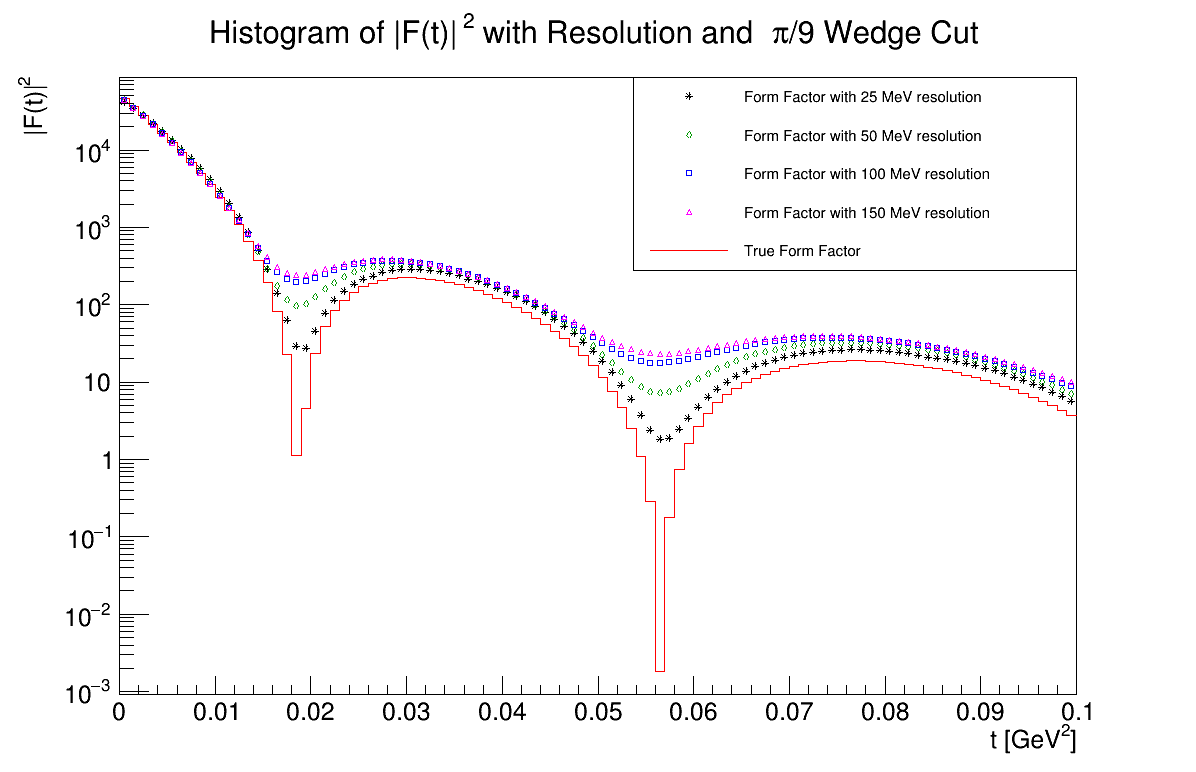

In [8]:
TCanvas *c1 = new TCanvas("", "", 1200, 800);

TH1D *ff_true_hist = ff_1d.getFF_hist();
    ff_true_hist->SetTitle("Histogram of |F(t)|^{2} with Resolution and #pi/9 Wedge Cut");
    ff_true_hist->GetYaxis()->SetTitle("|F(t)|^{2}");
    ff_true_hist->GetXaxis()->SetTitle("t [GeV^{2}]");
    ff_true_hist->GetYaxis()->SetRangeUser(1e-5,1e5);
    ff_true_hist->SetLineStyle(1);
    ff_true_hist->SetLineColor(kRed);
    ff_true_hist->Scale(197./ff_true_hist->Integral(), "width");
    ff_true_hist->Draw();
      
TH1D *ff_hist_25 = ff_wResCut_1d_25.getWedgeRes_hist_1D();
    ff_hist_25->GetYaxis()->SetRangeUser(1e-5,1e5);
    ff_hist_25->Scale(197./ff_hist_25->Integral(), "width");
    ff_hist_25->SetMarkerStyle(3);
    ff_hist_25->SetMarkerSize(0.9);
    ff_hist_25->SetMarkerColor(kBlack);
    ff_hist_25->Draw("P HIST same");


TH1D *ff_hist_50 = ff_wResCut_1d_50.getWedgeRes_hist_1D();
    ff_hist_50->GetYaxis()->SetRangeUser(1e-5,1e5);
    ff_hist_50->Scale(197./ff_hist_50->Integral(), "width");
    ff_hist_50->SetMarkerStyle(27);
    ff_hist_50->SetMarkerSize(0.9);
    ff_hist_50->SetMarkerColor(kGreen+2);
    ff_hist_50->Draw("P HIST same");

TH1D *ff_hist_100 = ff_wResCut_1d_100.getWedgeRes_hist_1D();
    ff_hist_100->Scale(197./ff_hist_100->Integral(), "width");
    ff_hist_100->SetMarkerStyle(25);
    ff_hist_100->SetMarkerSize(0.7);
    ff_hist_100->SetMarkerColor(kBlue);
    ff_hist_100->Draw("P HIST same");

TH1D *ff_hist_150 = ff_wResCut_1d_150.getWedgeRes_hist_1D();
    ff_hist_150->Scale(197./ff_hist_150->Integral(), "width");
    ff_hist_150->SetMarkerStyle(26);
    ff_hist_150->SetMarkerSize(0.7);
    ff_hist_150->SetMarkerColor(kMagenta);
    ff_hist_150->Draw("P HIST same");

auto legend = new TLegend(0.53,0.65,0.9,0.9);
	legend->AddEntry(ff_hist_25,"Form Factor with 25 MeV resolution","p");
    legend->AddEntry(ff_hist_50,"Form Factor with 50 MeV resolution","p");
    legend->AddEntry(ff_hist_100,"Form Factor with 100 MeV resolution","p");
    legend->AddEntry(ff_hist_150,"Form Factor with 150 MeV resolution","p");
    legend->AddEntry(ff_true_hist,"True Form Factor","l");
    legend->Draw();

gPad->SetLogy(1);
gStyle->SetOptStat(0);
c1->Update();
c1->Draw();

### Data from $\phi$ saturation model plot scan

In [3]:
const int phi_bins = 72;
double phi_sat_min = 0.002, phi_sat_max = .17;
double phi_x_vals[phi_bins] = {0.00149180044251802,0.00414660644107207,0.00658017860641328,0.00901375077175449,0.0116685567703085,0.0141021289356497,0.0167569349342038,0.019190507099545,
0.0216240792648862,0.0240576514302274,0.0264912235955686,0.0291460295941226,0.031358367926251,0.0340131739248051,0.0364467460901463,0.0388803182554875,0.0413138904208287,
0.0437474625861699,0.0464022685847239,0.0488358407500651,0.0514906467486192,0.0539242189139604,0.0565790249125144,0.0587913632446428,0.0614461692431968,0.063879741408538,
0.0663133135738793,0.0687468857392204,0.0714016917377745,0.0738352639031157,0.0762688360684569,0.078923642067011,0.0813572142323522,0.0837907863976934,0.0864455923962474,
0.0888791645615886,0.0913127367269298,0.093746308892271,0.0961798810576122,0.0988346870561663,0.101268259221507,0.103701831386849,0.10613540355219,0.108347741884318,
0.111223781716085,0.113657353881426,0.115869692213555,0.118745732045322,0.121400538043876,0.123391642542791,0.126267682374558,0.128480020706686,0.130913592872028,0.133568398870582,
0.13578073720271,0.138656777034477,0.140869115366605,0.143523921365159,0.145736259697288,0.148391065695842,0.151045871694396,0.153479443859737,0.155913016025078,0.158346588190419,
0.161001394188973,0.163213732521102,0.165868538519656,0.168302110684997,0.170735682850338,0.173390488848892,0.175824061014234,0.178257633179575};
double phi_y_vals[phi_bins] = {558853.176136302,224087.526703047,77159.7780282615,21685.4626196854,3859.28092747389,469.329022940005,289.742995521137,760.224527180162,
1470.8807418139,1802.07568265643,1669.9354709361,1434.01276162091,1170.46235898057,841.471980674726,519.487609780666,282.480517526656,122.231121530435,44.2796290689089,
12.7645685962943,8.2906879074936,17.31009647318,34.352592563701,55.6447229185968,73.5686667137878,87.8747301398829,92.4512729862438,94.8281637591125,90.133959553294,
79.3900768010247,68.1741212520722,54.2499745313981,42.0876893247695,31.8336312913207,22.312279620763,14.1287559597991,8.94672119409074,4.99001275499674,2.71340713225333,
1.43847998384123,1.00823457225525,1.11598759598992,1.47546281479756,2.21472290755771,3.15981484859246,4.07292198289417,4.74299606783303,5.523310241139,6.11360281380503,
6.59736568024521,6.59736568024521,6.43200111987633,5.96036388624306,5.523310241139,5.11830428512649,4.50820725397009,3.87130332084099,3.08061332807508,2.64539492870511,
2.15921034425629,1.55230536986868,1.14467925737936,0.888053964582182,0.638442170129982,0.384266614281411,0.29811799949135,0.198608151462336,0.12899755970887,
0.139204998947095,0.150220141959229,0.162106901482951,0.198608151462336,0.237229223974273,};

// Initialize constructos to compare saturation model
FormFactor_saturation_data phi_saturation(phi_bins,phi_x_vals,phi_y_vals);
FormFactor_t_1D ff_phi(A,Vo,R,a0,phi_sat_min,phi_sat_max,phi_bins,r_min,r_max);

## Compare $\phi$ saturation model with form factors of different resolutions

In [4]:
FormFactor_resolution_add_wedge_1D ff_wResCut_1d_25_phi(A,Vo,R,a0,phi_sat_min,phi_sat_max,phi_bins,phi_min,phi_max,sigma25,r_min,r_max);

FormFactor_resolution_add_wedge_1D ff_wResCut_1d_50_phi(A,Vo,R,a0,phi_sat_min,phi_sat_max,phi_bins,phi_min,phi_max,sigma50,r_min,r_max);

FormFactor_resolution_add_wedge_1D ff_wResCut_1d_100_phi(A,Vo,R,a0,phi_sat_min,phi_sat_max,phi_bins,phi_min,phi_max,sigma100,r_min,r_max);

FormFactor_resolution_add_wedge_1D ff_wResCut_1d_150_phi(A,Vo,R,a0,phi_sat_min,phi_sat_max,phi_bins,phi_min,phi_max,sigma150,r_min,r_max);

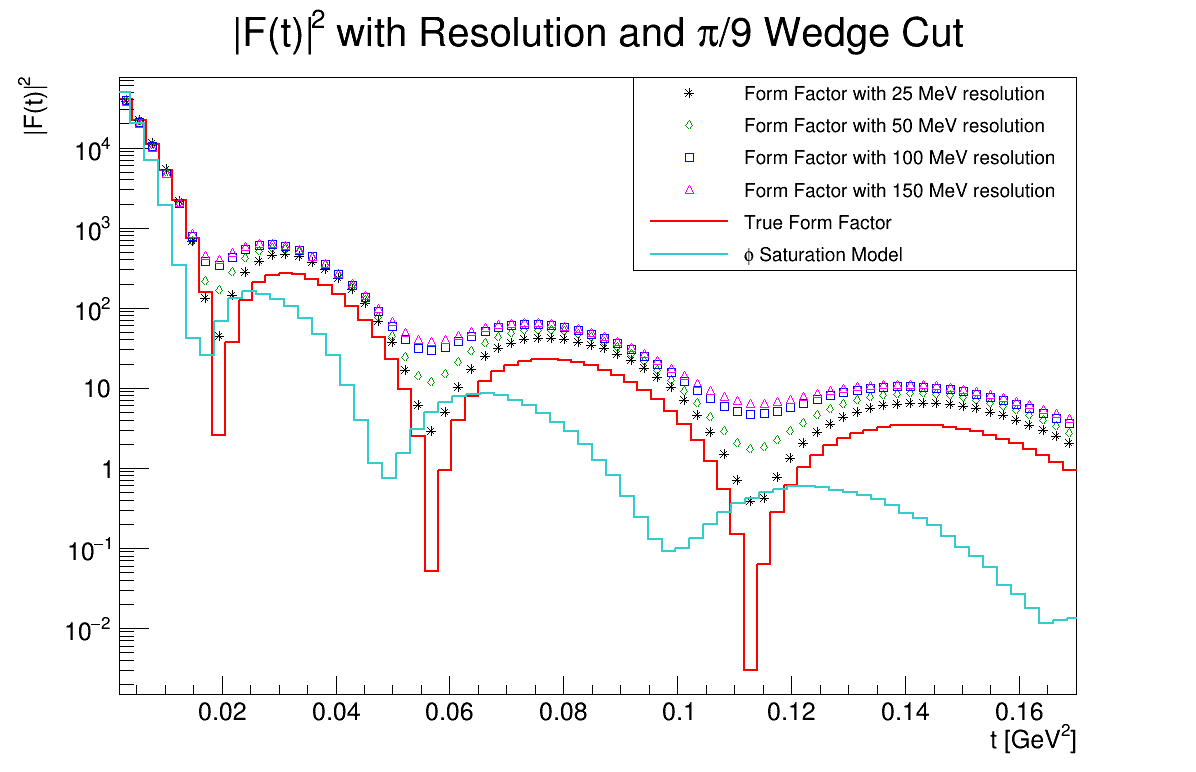

In [5]:
TCanvas *c1 = new TCanvas("", "", 1200, 800);

TH1D *ff_true_phi = ff_phi.getFF_hist();
    ff_true_phi->SetTitle("|F(t)|^{2} with Resolution and #pi/9 Wedge Cut");
    ff_true_phi->GetYaxis()->SetTitle("|F(t)|^{2}");
    ff_true_phi->GetXaxis()->SetTitle("t [GeV^{2}]");
    ff_true_phi->SetLineStyle(1);
    ff_true_phi->SetLineWidth(2);
    ff_true_phi->SetLineColor(kRed);
    ff_true_phi->Scale(197./ff_true_phi->Integral(), "width");
    ff_true_phi->Draw();

TH1D *ff_phi_25 = ff_wResCut_1d_25_phi.getWedgeRes_hist_1D();
    ff_phi_25->Scale(197./ff_phi_25->Integral(), "width");
    ff_phi_25->SetMarkerStyle(3);
    ff_phi_25->SetMarkerSize(1.2);
    ff_phi_25->SetMarkerColor(kBlack);
    ff_phi_25->Draw("P HIST same");

TH1D *ff_phi_50 = ff_wResCut_1d_50_phi.getWedgeRes_hist_1D();
    ff_phi_50->Scale(197./ff_phi_50->Integral(), "width");
    ff_phi_50->SetMarkerStyle(27);
    ff_phi_50->SetMarkerSize(1.2);
    ff_phi_50->SetMarkerColor(kGreen+2);
    ff_phi_50->Draw("P HIST same");

TH1D *ff_phi_100 = ff_wResCut_1d_100_phi.getWedgeRes_hist_1D();
    ff_phi_100->Scale(197./ff_phi_100->Integral(), "width");
    ff_phi_100->SetMarkerStyle(25);
    ff_phi_100->SetMarkerSize(1);
    ff_phi_100->SetMarkerColor(kBlue);
    ff_phi_100->Draw("P HIST same");

TH1D *ff_phi_150 = ff_wResCut_1d_150_phi.getWedgeRes_hist_1D();
    ff_phi_150->Scale(197./ff_phi_150->Integral(), "width");
    ff_phi_150->SetMarkerStyle(26);
    ff_phi_150->SetMarkerSize(1);
    ff_phi_150->SetMarkerColor(kMagenta);
    ff_phi_150->Draw("P HIST same");

TH1D *ff_phi_sat = phi_saturation.getHist();
    ff_phi_sat->SetLineStyle(1);
    ff_phi_sat->SetLineWidth(2);
    ff_phi_sat->SetLineColor(kCyan-3);
    ff_phi_sat->Scale(197./ff_phi_sat->Integral(), "width");
    for (int i = 1; i <= ff_phi_sat->GetNbinsX(); ++i)
    { 
        ff_phi_sat->SetBinError(i, 0); // Setting error bars to zero 
    }
    ff_phi_sat->Draw("HIST same");

auto legend = new TLegend(0.53,0.65,0.9,0.9);
	legend->AddEntry(ff_phi_25,"Form Factor with 25 MeV resolution","p");
    legend->AddEntry(ff_phi_50,"Form Factor with 50 MeV resolution","p");
    legend->AddEntry(ff_phi_100,"Form Factor with 100 MeV resolution","p");
    legend->AddEntry(ff_phi_150,"Form Factor with 150 MeV resolution","p");
    legend->AddEntry(ff_true_phi,"True Form Factor","l");
    legend->AddEntry(ff_phi_sat,"#phi Saturation Model","l");
    legend->Draw();

gPad->SetLogy(1);
gStyle->SetOptStat(0);
c1->Update();
c1->Draw();

### Data from $J/\psi$ saturation model plot scan

In [12]:
const int Jpsi_bins = 70;
double Jpsi_min = 0, Jpsi_max = .18;
double Jpsi_x_vals[Jpsi_bins] = {0.00136281334124255, 0.00417373659242085, 0.00679726496018727, 0.0090460035611299, 0.0114821370454844, 0.0141056654132508, 0.0165417988976054, 0.0189779323819599,
0.0216014607497263, 0.0240375942340808, 0.0266611226018472, 0.0339695230549108, 0.0364056565392653, 0.0390291849070318, 0.0414653183913863, 0.0439014518757408,
0.0465249802435072, 0.0487737188444499, 0.0513972472122163, 0.0538333806965708, 0.0564569090643372, 0.0588930425486917, 0.0613291760330463, 0.0637653095174008,
0.0662014430017553, 0.0686375764861098, 0.0712611048538762, 0.0736972383382308, 0.0763207667059972, 0.0787569001903517, 0.0811930336747062, 0.0838165620424727,
0.0862526955268272, 0.0886888290111817, 0.0913123573789481, 0.0937484908633026, 0.0961846243476572, 0.0986207578320117, 0.101056891316366, 0.103680419684133,
0.106116553168487, 0.108552686652842, 0.110988820137196, 0.113612348504963, 0.116048481989317, 0.118484615473672, 0.120920748958026, 0.123356882442381,
0.125980410810147, 0.12822914941109, 0.131040072662268, 0.133288811263211, 0.135912339630977, 0.138348473115332, 0.140784606599686, 0.143408134967453,
0.145844268451807, 0.148467796819574, 0.150903930303928, 0.153340063788283, 0.155776197272637, 0.158399725640404, 0.160835859124758, 0.163271992609113,
0.165895520976879, 0.168331654461233, 0.170767787945588, 0.173391316313354, 0.175640054914297, 0.178076188398652};
double Jpsi_y_vals[Jpsi_bins] = {13448.9218102926, 6937.46196167787, 3204.7878500576, 1305.08427031405, 446.872520224438, 103.18239774925, 8.55278296449268,
11.005917498039, 31.6399824551623, 54.9298751813913, 66.3663164066068, 60.3779220946169, 46.9201466951133, 32.653225248372, 21.3360051124315,
12.4849168326106, 6.24035001776384, 2.58162492032996, 0.912279863030455, 0.596094495215495, 1.1375147582384, 2.17069581349244, 3.37486862233193,
4.3428584331333, 5.16499432428701, 5.58848994755982, 5.7674564552788, 5.67726804222898, 5.41507684299759, 4.84942389709097, 4.14229378615772,
3.48294584122589, 2.83767526873991, 2.17069581349244, 1.60896053571582, 1.15558518403178, 0.779253636732963, 0.485658601659348, 0.288701178756081,
0.163693431856085, 0.110384508079367, 0.100424245161287, 0.148922974953952, 0.197774527183426, 0.27106213627279, 0.343354491666976, 0.408354089359272,
0.470588418718807, 0.525479418352291, 0.533827122649325, 0.586773086901781, 0.577597441807907, 0.568565280566255, 0.533827122649325, 0.525479418352291,
0.493373717141273, 0.434927240554336, 0.377409027059443, 0.322376245262033, 0.27974266435082, 0.238951332128076, 0.188640778332054, 0.151288747835883,
0.123260124544862, 0.0885276988118201, 0.06258796389094, 0.0486375871383818, 0.032285236309424, 0.0250891049438687, 0.0191920533212076};

// Initialize constructos to compare saturation model
FormFactor_saturation_data Jpsi_saturation(Jpsi_bins,Jpsi_x_vals,Jpsi_y_vals);
FormFactor_t_1D ff_Jpsi(A,Vo,R,a0,Jpsi_min,Jpsi_max,Jpsi_bins,r_min,r_max);

## Compare $J/\psi$ saturation model with form factors of different resolutions¶

In [13]:
FormFactor_resolution_add_wedge_1D ff_wResCut_1d_25_Jpsi(A,Vo,R,a0,Jpsi_min,Jpsi_max,Jpsi_bins,phi_min,phi_max,sigma25,r_min,r_max);

FormFactor_resolution_add_wedge_1D ff_wResCut_1d_50_Jpsi(A,Vo,R,a0,Jpsi_min,Jpsi_max,Jpsi_bins,phi_min,phi_max,sigma50,r_min,r_max);

FormFactor_resolution_add_wedge_1D ff_wResCut_1d_100_Jpsi(A,Vo,R,a0,Jpsi_min,Jpsi_max,Jpsi_bins,phi_min,phi_max,sigma100,r_min,r_max);

FormFactor_resolution_add_wedge_1D ff_wResCut_1d_150_Jpsi(A,Vo,R,a0,Jpsi_min,Jpsi_max,Jpsi_bins,phi_min,phi_max,sigma150,r_min,r_max);

### Compare $J/\psi$ saturation model with form factors of different resolutions¶

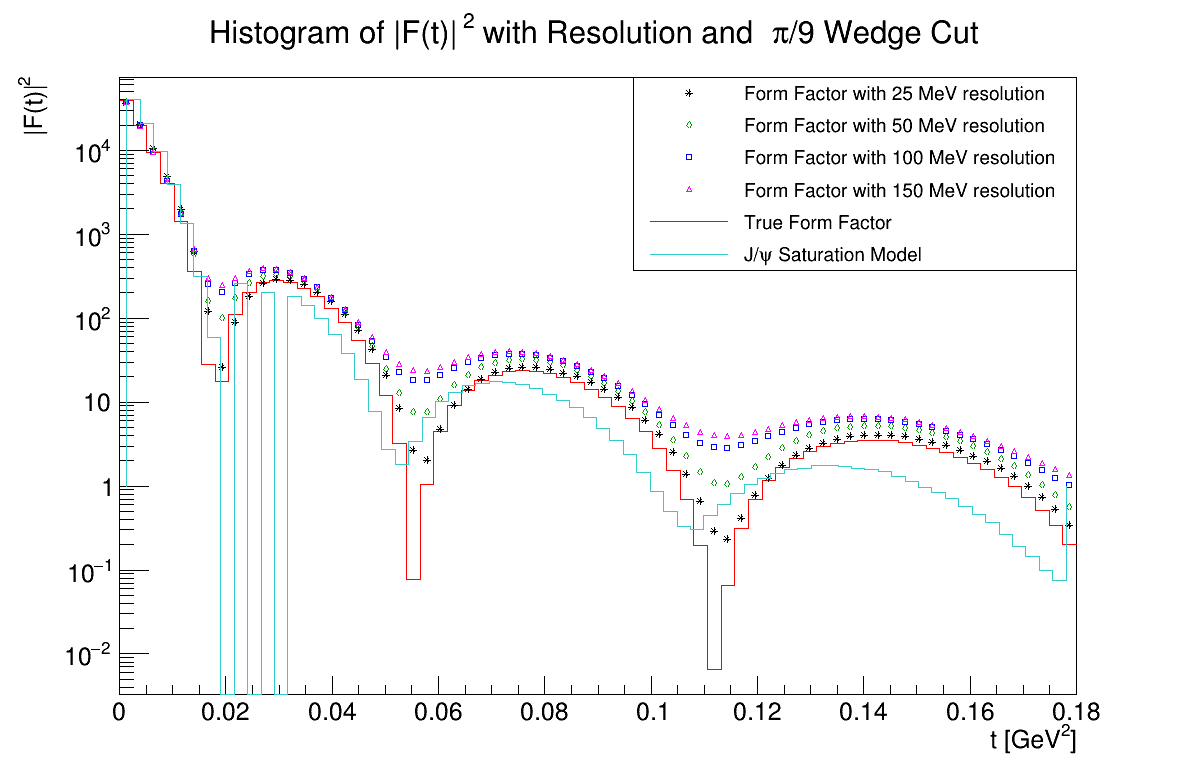

In [14]:
TCanvas *c1 = new TCanvas("", "", 1200, 800);

TH1D *ff_true_Jpsi = ff_Jpsi.getFF_hist();
    ff_true_Jpsi->SetTitle("Histogram of |F(t)|^{2} with Resolution and #pi/9 Wedge Cut");
    ff_true_Jpsi->GetYaxis()->SetTitle("|F(t)|^{2}");
    ff_true_Jpsi->GetXaxis()->SetTitle("t [GeV^{2}]");
    ff_true_Jpsi->Scale(197./ff_true_Jpsi->Integral(), "width");
    ff_true_Jpsi->SetLineStyle(1);
    ff_true_Jpsi->SetLineColor(kRed);
    ff_true_Jpsi->Draw();

TH1D *ff_Jpsi_25 = ff_wResCut_1d_25_Jpsi.getWedgeRes_hist_1D();
    ff_Jpsi_25->Scale(197./ff_Jpsi_25->Integral(), "width");
    ff_Jpsi_25->SetMarkerStyle(3);
    ff_Jpsi_25->SetMarkerSize(0.9);
    ff_Jpsi_25->SetMarkerColor(kBlack);
    ff_Jpsi_25->Draw("P HIST same");

TH1D *ff_Jpsi_50 = ff_wResCut_1d_50_Jpsi.getWedgeRes_hist_1D();
    ff_Jpsi_50->Scale(197./ff_Jpsi_50->Integral(), "width");
    ff_Jpsi_50->SetMarkerStyle(27);
    ff_Jpsi_50->SetMarkerSize(0.9);
    ff_Jpsi_50->SetMarkerColor(kGreen+2);
    ff_Jpsi_50->Draw("P HIST same");

TH1D *ff_Jpsi_100 = ff_wResCut_1d_100_Jpsi.getWedgeRes_hist_1D();
    ff_Jpsi_100->Scale(197./ff_Jpsi_100->Integral(), "width");
    ff_Jpsi_100->SetMarkerStyle(25);
    ff_Jpsi_100->SetMarkerSize(0.7);
    ff_Jpsi_100->SetMarkerColor(kBlue);
    ff_Jpsi_100->Draw("P HIST same");

TH1D *ff_Jpsi_150 = ff_wResCut_1d_150_Jpsi.getWedgeRes_hist_1D();
    ff_Jpsi_150->Scale(197./ff_Jpsi_150->Integral(), "width");
    ff_Jpsi_150->SetMarkerStyle(26);
    ff_Jpsi_150->SetMarkerSize(0.7);
    ff_Jpsi_150->SetMarkerColor(kMagenta);
    ff_Jpsi_150->Draw("P HIST same");

TH1D *ff_Jpsi_sat = Jpsi_saturation.getHist();
    ff_Jpsi_sat->SetLineStyle(1);
    ff_Jpsi_sat->SetLineColor(kCyan-3);
    ff_Jpsi_sat->Scale(197./ff_Jpsi_sat->Integral(), "width");
    for (int i = 1; i <= ff_Jpsi_sat->GetNbinsX(); ++i)
    { 
        ff_Jpsi_sat->SetBinError(i, 0); // Setting error bars to zero 
    }
    ff_Jpsi_sat->Draw("HIST same");

auto legend = new TLegend(0.53,0.65,0.9,0.9);
	legend->AddEntry(ff_Jpsi_25,"Form Factor with 25 MeV resolution","p");
    legend->AddEntry(ff_Jpsi_50,"Form Factor with 50 MeV resolution","p");
    legend->AddEntry(ff_Jpsi_100,"Form Factor with 100 MeV resolution","p");
    legend->AddEntry(ff_Jpsi_150,"Form Factor with 150 MeV resolution","p");
    legend->AddEntry(ff_true_Jpsi,"True Form Factor","l");
    legend->AddEntry(ff_Jpsi_sat,"J/#psi Saturation Model","l");
    legend->Draw();

gPad->SetLogy(1);
gStyle->SetOptStat(0);
c1->Update();
c1->Draw();

## Compare TH2D Histograms

In [3]:
double bins_2d = 100;

In [4]:
FormFactor_resolution_add_wedge_2D ff_wResCut_2d_25(A,Vo,R,a0,ty_min,ty_max,tx_prime_min,tx_prime_max,bins_2d,phi_min,phi_max,sigma25,x_min,x_max,y_min,y_max);

In [5]:
FormFactor_resolution_add_wedge_2D ff_wResCut_2d_50(A,Vo,R,a0,ty_min,ty_max,tx_prime_min,tx_prime_max,bins_2d,phi_min,phi_max,sigma50,x_min,x_max,y_min,y_max);

In [6]:
FormFactor_resolution_add_wedge_2D ff_wResCut_2d_100(A,Vo,R,a0,ty_min,ty_max,tx_prime_min,tx_prime_max,bins_2d,phi_min,phi_max,sigma100,x_min,x_max,y_min,y_max);

In [7]:
FormFactor_resolution_add_wedge_2D ff_wResCut_2d_150(A,Vo,R,a0,ty_min,ty_max,tx_prime_min,tx_prime_max,bins_2d,phi_min,phi_max,sigma150,x_min,x_max,y_min,y_max);

In [8]:
FormFactor_t_2D ff_2d(A,Vo,R,a0,tx_min,tx_max,ty_min,ty_max,bins_2d,x_min,x_max,y_min,y_max);

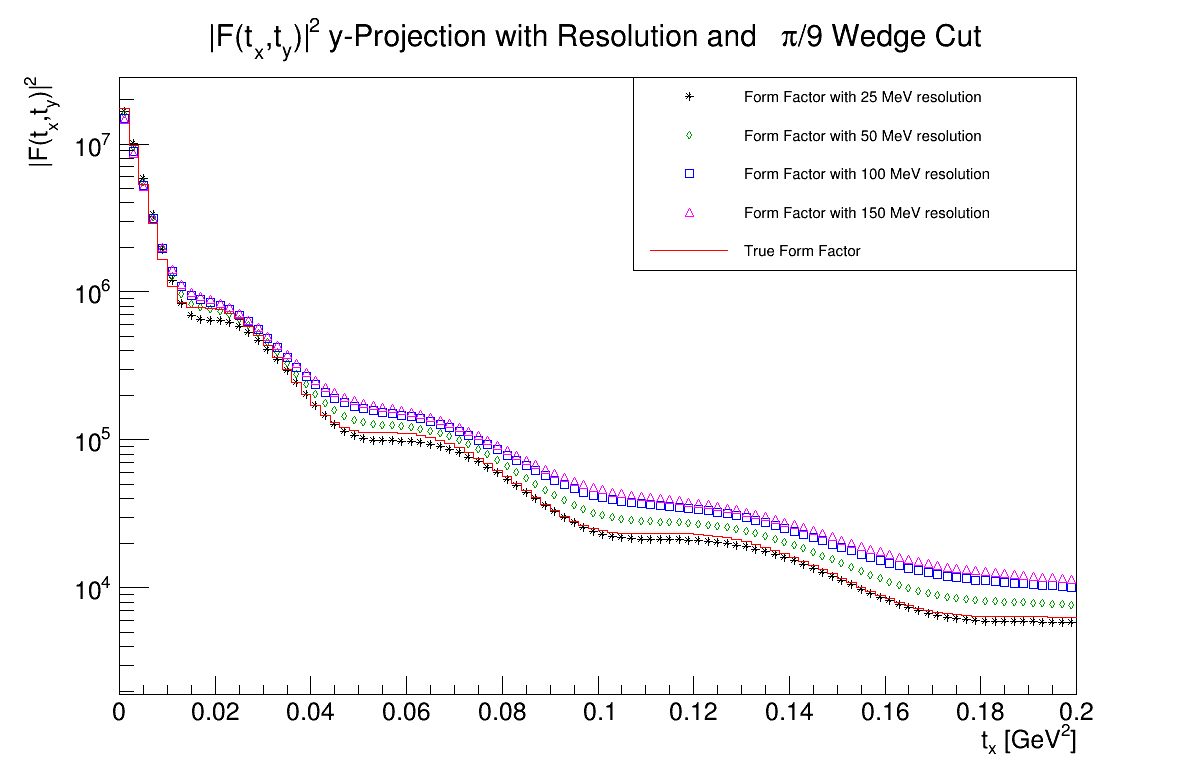

In [9]:
TCanvas *c1 = new TCanvas("", "", 1200, 800);

TH2D *trueFF_hist = ff_2d.getFormFactort_hist();
    trueFF_hist->SetTitle("|F(t_{x},t_{y})|^{2} y-Projection with Resolution and #pi/9 Wedge Cut");
    trueFF_hist->GetZaxis()->SetTitle("|F(t_{x},t_{y})|^{2}");
    trueFF_hist->GetYaxis()->SetTitle("t_{y} [GeV^{2}]");
    trueFF_hist->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
    trueFF_hist->Scale(197./trueFF_hist->Integral(), "width");
    trueFF_hist->SetLineColor(kRed);
    trueFF_hist->SetLineWidth(2);
    trueFF_hist->SetLineStyle(10);

TH2D *ff_hist2d_25 = ff_wResCut_2d_25.getWedgeRes_hist_2D();
    ff_hist2d_25->Scale(197./ff_hist2d_25->Integral(), "width");
    ff_hist2d_25->SetMarkerStyle(3);
    ff_hist2d_25->SetMarkerSize(1.2);
    ff_hist2d_25->SetMarkerColor(kBlack);

TH2D *ff_hist2d_50 = ff_wResCut_2d_50.getWedgeRes_hist_2D();
    ff_hist2d_50->Scale(197./ff_hist2d_50->Integral(), "width");
    ff_hist2d_50->SetMarkerStyle(27);
    ff_hist2d_50->SetMarkerSize(1.2);
    ff_hist2d_50->SetMarkerColor(kGreen+2);

TH2D *ff_hist2d_100 = ff_wResCut_2d_100.getWedgeRes_hist_2D();
    ff_hist2d_100->Scale(197./ff_hist2d_100->Integral(), "width");
    ff_hist2d_100->SetMarkerStyle(25);
    ff_hist2d_100->SetMarkerSize(1);
    ff_hist2d_100->SetMarkerColor(kBlue);

TH2D *ff_hist2d_150 = ff_wResCut_2d_150.getWedgeRes_hist_2D();
    ff_hist2d_150->Scale(197./ff_hist2d_150->Integral(), "width");
    ff_hist2d_150->SetMarkerStyle(26);
    ff_hist2d_150->SetMarkerSize(1);
    ff_hist2d_150->SetMarkerColor(kMagenta);

THStack *hs = new THStack("hs", "|F(t_{x},t_{y})|^{2} y-Projection with Resolution and #pi/9 Wedge Cut");

hs->Add(ff_hist2d_25->ProjectionY("proj_25"));
hs->Add(ff_hist2d_50->ProjectionY("proj_50"));
hs->Add(ff_hist2d_100->ProjectionY("proj_100"));
hs->Add(ff_hist2d_150->ProjectionY("proj_150"));

hs->Draw("NOSTACK P");

trueFF_hist->ProjectionY("proj_true")->Draw("HIST SAME");

hs->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
hs->GetYaxis()->SetTitle("|F(t_{x},t_{y})|^{2}");

auto legend = new TLegend(0.53,0.65,0.9,0.9);
    legend->AddEntry("proj_25", "Form Factor with 25 MeV resolution", "p");
    legend->AddEntry("proj_50", "Form Factor with 50 MeV resolution", "p");
    legend->AddEntry("proj_100", "Form Factor with 100 MeV resolution", "p");
    legend->AddEntry("proj_150", "Form Factor with 150 MeV resolution", "p");
    legend->AddEntry("proj_true", "True Form Factor", "l");
    legend->Draw();

gPad->Update();
gPad->SetLogy(1);
c1->Draw();